In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from latent_maximum_model import LatentMaximumDataGenerator, LatentMaximumModel

## Data Generating Process

$$y = \alpha (s - \vec x \beta)^2 + \vec x' \beta' + \epsilon $$

where $y$ is observed, $s, \vec x, \vec x'$ are features known from the data. The parameter $\alpha < 0$, so $E[y]$ is a concave function of $s$.

The quantity of interest is $\vec x \beta$, since we want to find, given the values of the features $\vec x, \vec x'$, the value of $s$ which maximizes $y$. We use the shorthand:

$$ \mu = \vec x \beta $$

In [27]:
lmg = LatentMaximumDataGenerator(residual_std=0.0, maximum_noise_std=0.0)
df = lmg.generate(10000)

Text(0, 0.5, '$y$')

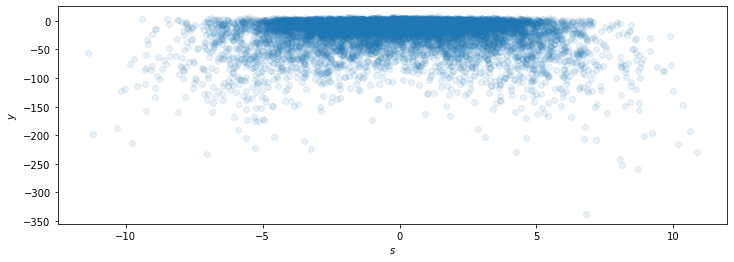

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.scatter(df['s'], df['y'], alpha=0.1)
ax.set_xlabel('$s$')
ax.set_ylabel('$y$')

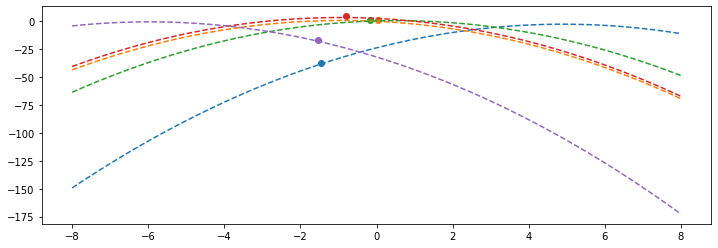

In [29]:
fig, ax = plt.subplots(figsize=(12, 4))

t = np.linspace(-8, 8, num=50)

for _, row in df[:5].iterrows():
    f = lambda x: lmg.a * (x - row['mu'])**2 + row['A']
    ax.plot(t, f(t), linestyle='--')
    ax.scatter(row['s'], row['y'])

We fit the model to our data by taking our estimate of $y$ as:

$$ \hat y = \alpha (s - \vec x \beta)^2 + \vec x' \beta' $$

Then minimizing the MSE:

$$ MSE = \frac{1}{N} \sum_i (y_i - \hat y_i)^2 $$

The partial derivatives in question are:

$$ \frac{\partial MSE}{\partial \alpha} = \frac{-2}{N} ...$$

In [30]:
lmm = LatentMaximumModel(rtol=0.000001)

In [31]:
x_latent = df[['L0', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9']]
x_additive = df[['A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9']]

lmm.fit(
    x = df['s'],
    x_latent = x_latent,
    x_additive = x_additive,
    y = df['y']
)

In [32]:
# Actual values
lmg.latent_coefs

array([ 0.01675081, -0.42558623,  0.76330438,  0.8380297 , -0.95846452,
        0.82781838, -1.83846048,  0.75406439,  2.27942482, -1.41792221])

In [33]:
# Recovered from the model
lmm.latent_coefs

L0    0.016717
L1   -0.425610
L2    0.763264
L3    0.838054
L4   -0.958390
L5    0.827765
L6   -1.838447
L7    0.753954
L8    2.279337
L9   -1.417900
dtype: float64

In [34]:
lmg.intercept, lmm.intercept

(1.1510982137753696, 1.103969789834263)

In [38]:
lmg.additive_coefs

array([-0.76414672,  0.55895017,  1.45200701,  0.6440003 ,  0.44362408,
        0.52088925, -0.33665422,  1.0256409 ,  0.33927176,  0.1554552 ])

In [39]:
lmm.additive_coefs

A0   -0.759027
A1    0.554468
A2    1.441835
A3    0.638198
A4    0.436994
A5    0.516411
A6   -0.335782
A7    1.019501
A8    0.338203
A9    0.153191
dtype: float64

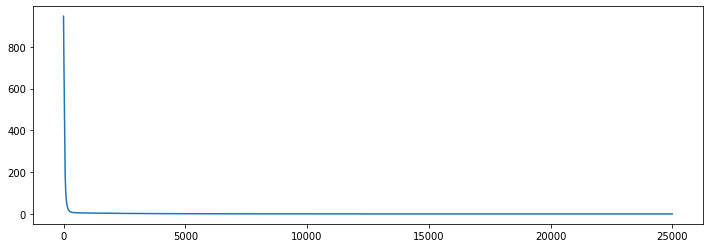

In [35]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(lmm.losses)

Text(0, 0.5, 'Esitmated Maximum')

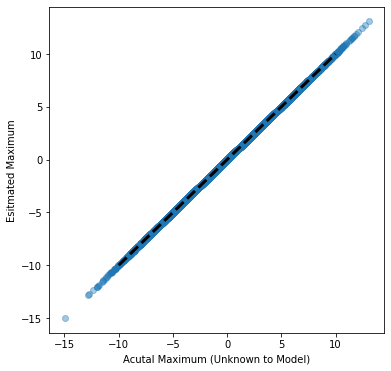

In [36]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.scatter(df['mu'], lmm.predict_mu(x_latent), alpha=0.4)
ax.plot(
    np.linspace(-10, 10),
    np.linspace(-10, 10),
    linewidth=3, 
    linestyle='--', 
    color='black'
)

ax.set_xlabel("Acutal Maximum (Unknown to Model)")
ax.set_ylabel("Esitmated Maximum")